In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [3]:
# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# You can use https://gracedb.ligo.org/api/superevents/MS230802n/files/bayestar.multiorder.fits,0
#skymap =  'https://gracedb.ligo.org/api/superevents/S231206cc/files/bayestar.multiorder.fits,1'
#skymap = 'https://gracedb.ligo.org/api/superevents/S240413p/files/bayestar.multiorder.fits,1'
#skymap = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
skymap = 'https://gracedb.ligo.org/api/superevents/S240915b/files/bayestar.multiorder.fits,1'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2024-09-15 00:15:14")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_LST.ini'
#cfgFile = '../../../../Gitlab/lst_tiling/config/FollowupParameters_1_BBH.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D). Path to th file is defined in datasetDir variable
galcatName = 'Gladeplus.h5'

# Tiles already observed
pointingsFile = None
#pointingsFile = '/Users/mseglar/GitHub/tilepy/examples/launcher/output/S240915b/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'


In [4]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [5]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,galcatName,outDir,pointingsFile)
obspar.from_configfile(cfgFile)

In [6]:
obspar.name

'LST'

### Run the scheduling

The file is already existing, it will be re-downloaded


Starting the 2D pointing calculation with the following parameters

Filename:  G511909
Date:  2024-09-15 00:15:14
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/G511909

============== Main parsed observation parameters ==============  
Observatory Name: LST
Observatory: 28.761944 deg
Observatory: -17.89 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.5
Max runs: 4
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 256
The strategy is (3D, None, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.0599 Number of runs that fulfill darkness condition  : 6 Number of effective pointings:  1

================================= Tiling found =============================================
     Time[UTC]      RA[deg]  DEC[deg]  PGW   Round ObsName Duration FoV
-------------------

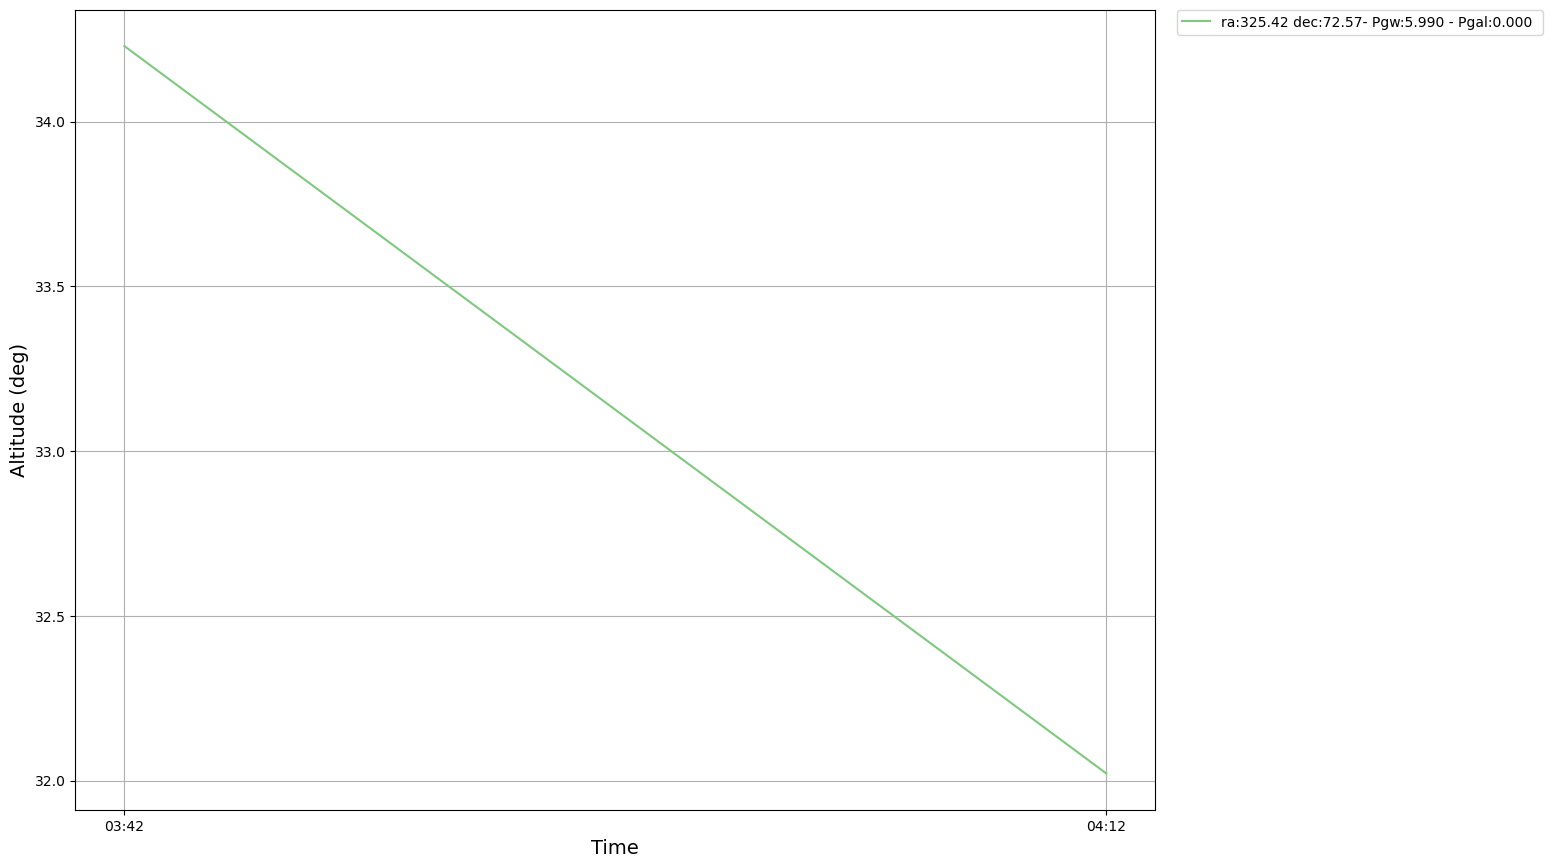

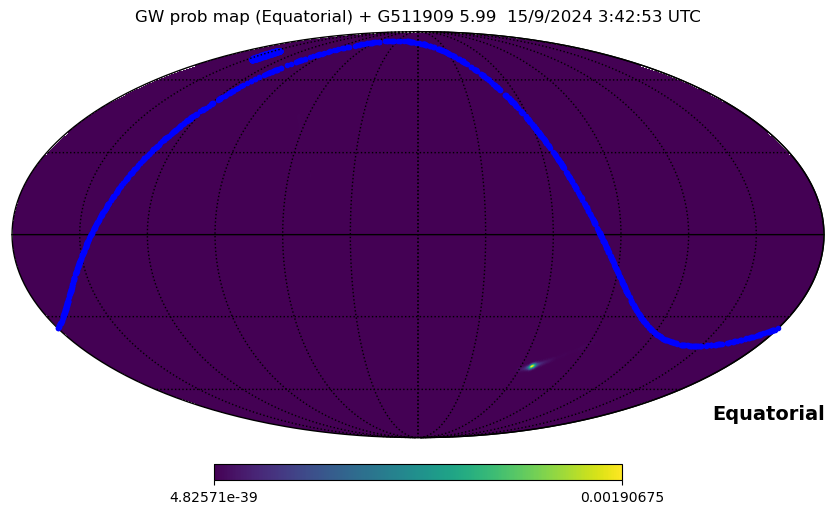

In [7]:
# Run the scheduler
GetSchedule(obspar)